# Liquor Sales in Iowa, US

## Project Overview:
As a Business Intelligence Analyst, **hypothetically** contracted by the Iowa Alcoholic Beverages Division (ABD), I'm specializing in deriving business value from retail sales data.

This dataset is publicly available, published by the State of Iowa to maintain transparency and support research on alcohol distribution and consumption trends. As part of a data-driven initiative, I was provided with a dataset detailing Liquor Sales in Iowa, US, spanning the years 2012-2020, to:

- Help assess retail alcohol market dynamics,

- Aid regulatory compliance audits,

- Support policy decisions,

- Or provide insight for expansion strategies in private liquor store chains.

### Stakeholders
The **potential** stakeholders here are multifaceted:

- **State Government & ABD:** Want insights for policy, taxation, and public health tracking.

- **Liquor Retail Chains:** Interested in optimizing inventory, pricing, and competitive positioning.

- **Vendors & Distributors:** Want to understand regional product popularity.

- **Data Journalists/Researchers:** Interested in socioeconomic patterns.

- **Local Governments:** Curious about county-specific alcohol sales trends.

## Tasks
The tasks at hand are, for the timeframe 2016-2019:

1) Discern the most popular item in each zipcode and
2) Compute the sales percentage per store (in dollars).

### Objectives:
1) Data Extraction and Cleaning: Extract pertinent data and conduct preliminary cleaning to handle missing or inconsistent data.
2) Data Analysis: Employ Python with Pandas or SQL to analyze the dataset, identifying the predominant item per zipcode and calculating the proportion of sales for each store between 2016 and 2019.
3) Data Visualization: Represent the analyzed data aesthetically and informatively using tools like matplotlib, seaborn, plotly, or integrate with visualization platforms such as Tableau Public, Power BI, Looker Studio, or HEX for a more interactive experience.
    - You will only need 1 type of graph for the solution, but feel free to experiment with different graphs and formats

### Workflow:
1) Data Preparation: Extract, clean, and prepare the dataset for analysis.
2) Exploratory Data Analysis (EDA): Explore the dataset to understand its structure, trends, and patterns.
3) Data Manipulation: Use Python and Pandas for data transformation and computation to derive insights.
4) Visualization and Presentation: Present the results in a visually appealing and informative manner using suitable visualization tools.

### Value of Answering the Task Questions
- Most popular item per zip code helps retailers with hyperlocal demand forecasting and inventory optimization.

- Sales percentage per store reveals store performance—essential for incentive structuring, resource allocation, or even closure decisions.

Both insights together allow for:

- Smarter marketing strategies

- Real-time price promotions

- Strategic vendor negotiations

- Better policy enforcement by identifying outliers in volume

## Import necessary modules

In [5]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Columns & Context

| Column Name            | Description |
|------------------------|-------------|
| `invoice_and_item_number` | Unique transaction identifier; ties invoices to specific items. |
| `date`                 | Date of transaction (sale) in MM/DD/YYYY format. |
| `store_number`         | Unique ID assigned to each store location. |
| `store_name`           | Name of the store where the transaction occurred. |
| `address`              | Physical address of the store. |
| `city`                 | City where the store is located. |
| `zip_code`             | Zip code for geographical segmentation. |
| `store_location`       | Full geolocation metadata (may include latitude/longitude in one field). |
| `county_number`        | Numerical code representing the county. |
| `county`               | Name of the county where the store operates. |
| `category`             | Numeric product category code. |
| `category_name`        | Descriptive product category (e.g., Vodka, Whiskey). |
| `vendor_number`        | Vendor's unique numeric ID. |
| `vendor_name`          | Name of the vendor supplying the item. |
| `item_number`          | Unique product ID within vendor catalog. |
| `item_description`     | Description of the item sold (often includes brand and type). |
| `pack`                 | Number of bottles in a pack. |
| `bottle_volume_ml`     | Volume of each bottle in milliliters. |
| `state_bottle_cost`    | Cost per bottle to the state (wholesale). |
| `state_bottle_retail`  | Retail price set by the state (markup included). |
| `bottles_sold`         | Quantity of bottles sold in a transaction. |
| `sale_dollars`         | Total revenue in USD from the sale. |
| `volume_sold_liters`   | Total volume sold in liters. |
| `volume_sold_gallons`  | Total volume sold in gallons (alternate unit). |
| `year`                 | Extracted year of transaction. |
| `lon`                  | Longitude coordinate of store (used in spatial analysis). |
| `lat`                  | Latitude coordinate of store. |


### Load the dataset

In [6]:
liquor_sales = pd.DataFrame(pd.read_csv('finance_liquor_sales.csv'))

## 1. Data Extraction & Data Cleaning

### 1.1 Handling Missing Values

In [7]:
liquor_sales.isna().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
year                       0
lon                        0
lat                        0
dtype: int64

Since we are seeing `NaN` values in the `store_location` column of the DataFrame, we can't assume by any means the correct values. That applies also to the rest of the columns with missing values: 
`['county_number', 'county', 'category', 'category_name']`. These are `type object` columns and we **can't impute** any orthological value to them. Based on the above, the best way to handle the missing values of this DataFrame is to **drop** them. 

In [8]:
liquor_sales = liquor_sales.dropna()
liquor_sales.isna().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
year                       0
lon                        0
lat                        0
dtype: int64

### 1.2 Cleaning & Transforming to Correct Type

In [9]:
# Converting date column to DateTime
liquor_sales['date'] = pd.to_datetime(liquor_sales['date'])

In [10]:
# Converting zip_code column to type integer
liquor_sales['zip_code'] = liquor_sales['zip_code'].astype(int)


The final step, before going into EDA and Insights Analysis, is extracting the date range in which we will perform the analysis.
The desired date range is between ***2016 & 2019***

We will achieve that, by creating a `year` column and then **filter** the DataFrame with the correct conditions.

In [11]:
# Create the Year column
liquor_sales['year'] = liquor_sales['date'].dt.year

In [12]:
# Filter the DataFrame for dates between 2016 and 2019
data = liquor_sales[(liquor_sales['year'] >= 2016) & (liquor_sales['year'] <= 2019)]
# Filter and the liquor_sales to write the correct version for Tableau Viz
liquor_sales = liquor_sales[(liquor_sales['year'] >= 2016) & (liquor_sales['year'] <= 2019)]

(Optional) Extract longitute and latitude from `store_location` column:
We need to:
- ✅ Extract the longitude and latitude numbers from the string
- ✅ Convert them into two separate columns
- ✅ Use Plotly’s scattergeo to plot them

##### 📝 Step 1: Extract coordinates from the string
We can use regex or string manipulation to extract the values inside the parentheses, then split them into longitude and latitude.

##### 📝 Step 2: Plot a scattergeo map with Plotly

##### 📝 Step 3: Write the updated DataFrame to the .csv file
---
Extracting and storing geographical coordinates directly in the dataset ensures seamless integration with Tableau’s mapping features, enabling automatic geospatial visualization without additional data preparation or transformation.

In [13]:
# Step 1
liquor_sales[['lon', 'lat']] = liquor_sales['store_location'].str.extract(r'\(([^)]+)\)')[0].str.strip().str.split(' ', expand=True)
liquor_sales['lon'] = liquor_sales['lon'].astype(float)
liquor_sales['lat'] = liquor_sales['lat'].astype(float)
# Optional print
# print(liquor_sales[['lon', 'lat']])

In [14]:
# Step 2
fig = go.Figure(go.Scattergeo(
    lon = liquor_sales['lon'],
    lat = liquor_sales['lat'],
    mode = 'markers',
    marker=dict(size=8, color='blue'),
    text = liquor_sales.index,  # optional: display row index or any label
))

fig.update_layout(
    title = 'Store Locations',
    geo_scope='usa',  # focuses map on USA
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Step 3
# Write the updated DataFrame back to the CSV
liquor_sales.to_csv('finance_liquor_sales.csv', index=False)

## 2. Data Analysis

### 2.1 Most Popular Item per zipcode

**Objective:**
To identify the most popular item per zip code between 2016 and 2019, we explore two distinct approaches: one driven by **volume** (total bottles sold) and the other by **revenue** (total sales in dollars). This dual approach ensures a comprehensive evaluation of item popularity from both **volume-driven** and **revenue-driven** perspectives.

---

##### **Approach 1: Volume-Driven Popularity (Total Bottles Sold)**

1. **Group by Zip Code and Item Description**:
   We first group the data by `zip_code` and `item_description`. For each zip code-item combination, we calculate the **total bottles sold**. This provides insights into the most frequently purchased items at the highest volume in each zip code.

2. **Sort by Bottles Sold in Descending Order**:
   After grouping the data, we sort the results by `bottles_sold` in **descending** order to ensure that the most popular items (by volume) appear at the top.

3. **Extract Top Row per Zip Code**:
   From the sorted data, we extract the **top row** per zip code, which gives us the **most sold item by volume** in each zip code.

---

##### **Approach 2: Revenue-Driven Popularity (Total Revenue)**

1. **Group by Zip Code and Item Description**:
   Similar to the volume-driven approach, we group the data by `zip_code` and `item_description`. However, this time we focus on calculating the **total revenue** generated by each item in each zip code, providing insights into which items contribute the most revenue.

2. **Sort by Revenue in Descending Order**:
   Once the revenue is calculated, we sort the data by **total revenue** in **descending** order to identify the items generating the highest sales.

3. **Extract Top Row per Zip Code**:
   We then extract the **top row** per zip code to determine the **most popular item by revenue** for each zip code.

---

##### **Why This Dual Approach?**

By leveraging both the volume and revenue-driven methodologies, we gain a **holistic understanding** of item popularity:

* **Volume-driven** analysis helps identify items that **sell the most** in terms of quantity, which is particularly useful for stock management and promotions aimed at increasing sales frequency.
* **Revenue-driven** analysis highlights items that **generate the most revenue**, giving insights into high-margin or premium products that contribute most significantly to overall sales.

This dual approach enables a more **comprehensive evaluation**, allowing businesses to tailor their strategies based on both **quantity sold** and **revenue generated**, ensuring well-rounded and informed decision-making.

---

##### **Conclusion:**

The combination of volume-based and revenue-based insights provides a **balanced view** of item performance, enabling businesses to prioritize products not only by how much is sold but also by how much they contribute to the bottom line. This ensures a **data-driven**, **actionable strategy** for inventory management, pricing, and promotional efforts.


#### 2.1.1 Volume Sales Approach

In [ ]:
# 1. Group by zip_code and item_description and 
# calculate total bottles sold
grouped_data1 = data.groupby(['zip_code', 'item_description'])['bottles_sold'].sum().reset_index()

# SOrt within each zip_code and bottles_sold descending
grouped_data1 = grouped_data1.sort_values(['zip_code', 'bottles_sold'], ascending=[True, False])

# Keep top row per zip_code
most_volume_sold_item = grouped_data1.drop_duplicates(subset='zip_code', keep='first')

# Convert zip_code to a categorical variable for better visualizations
most_volume_sold_item['zip_code'] = most_volume_sold_item['zip_code'].astype('category')

# Sort the results in descending order
most_volume_sold_item = most_volume_sold_item.sort_values('bottles_sold', ascending=False)

# Print the results
print(f'The most popular item by volume sales per zip_code is:\n{most_volume_sold_item}')

The most popular item by volume sales per zip_code is:
   zip_code                               item_description  bottles_sold
47    52314                                Juarez Gold Dss          1560
21    50702                              Tortilla Gold Dss           768
0     50010                       Member's Mark Spiced Rum           288
8     50314                              Juarez Triple Sec           240
28    51106                          Kahlua Coffee Liqueur           240
49    52402                           Montezuma Triple Sec           216
23    50703              Pinnacle Peach w/ Punch Dispenser           180
10    50320                        Di Amore Quattro Orange           120
17    50501                                    Titos Vodka           108
13    50327                           Bacardi Gold Rum PET           102
7     50266  Avion Silver w/Powell & Mahoney Margarita Mix            90
48    52338   Cedar Ridge Single Malt Single Barrel Select           

C:\Users\vagdi\AppData\Local\Temp\ipykernel_15872\3822932909.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Visualizing top 10 Using Seaborn

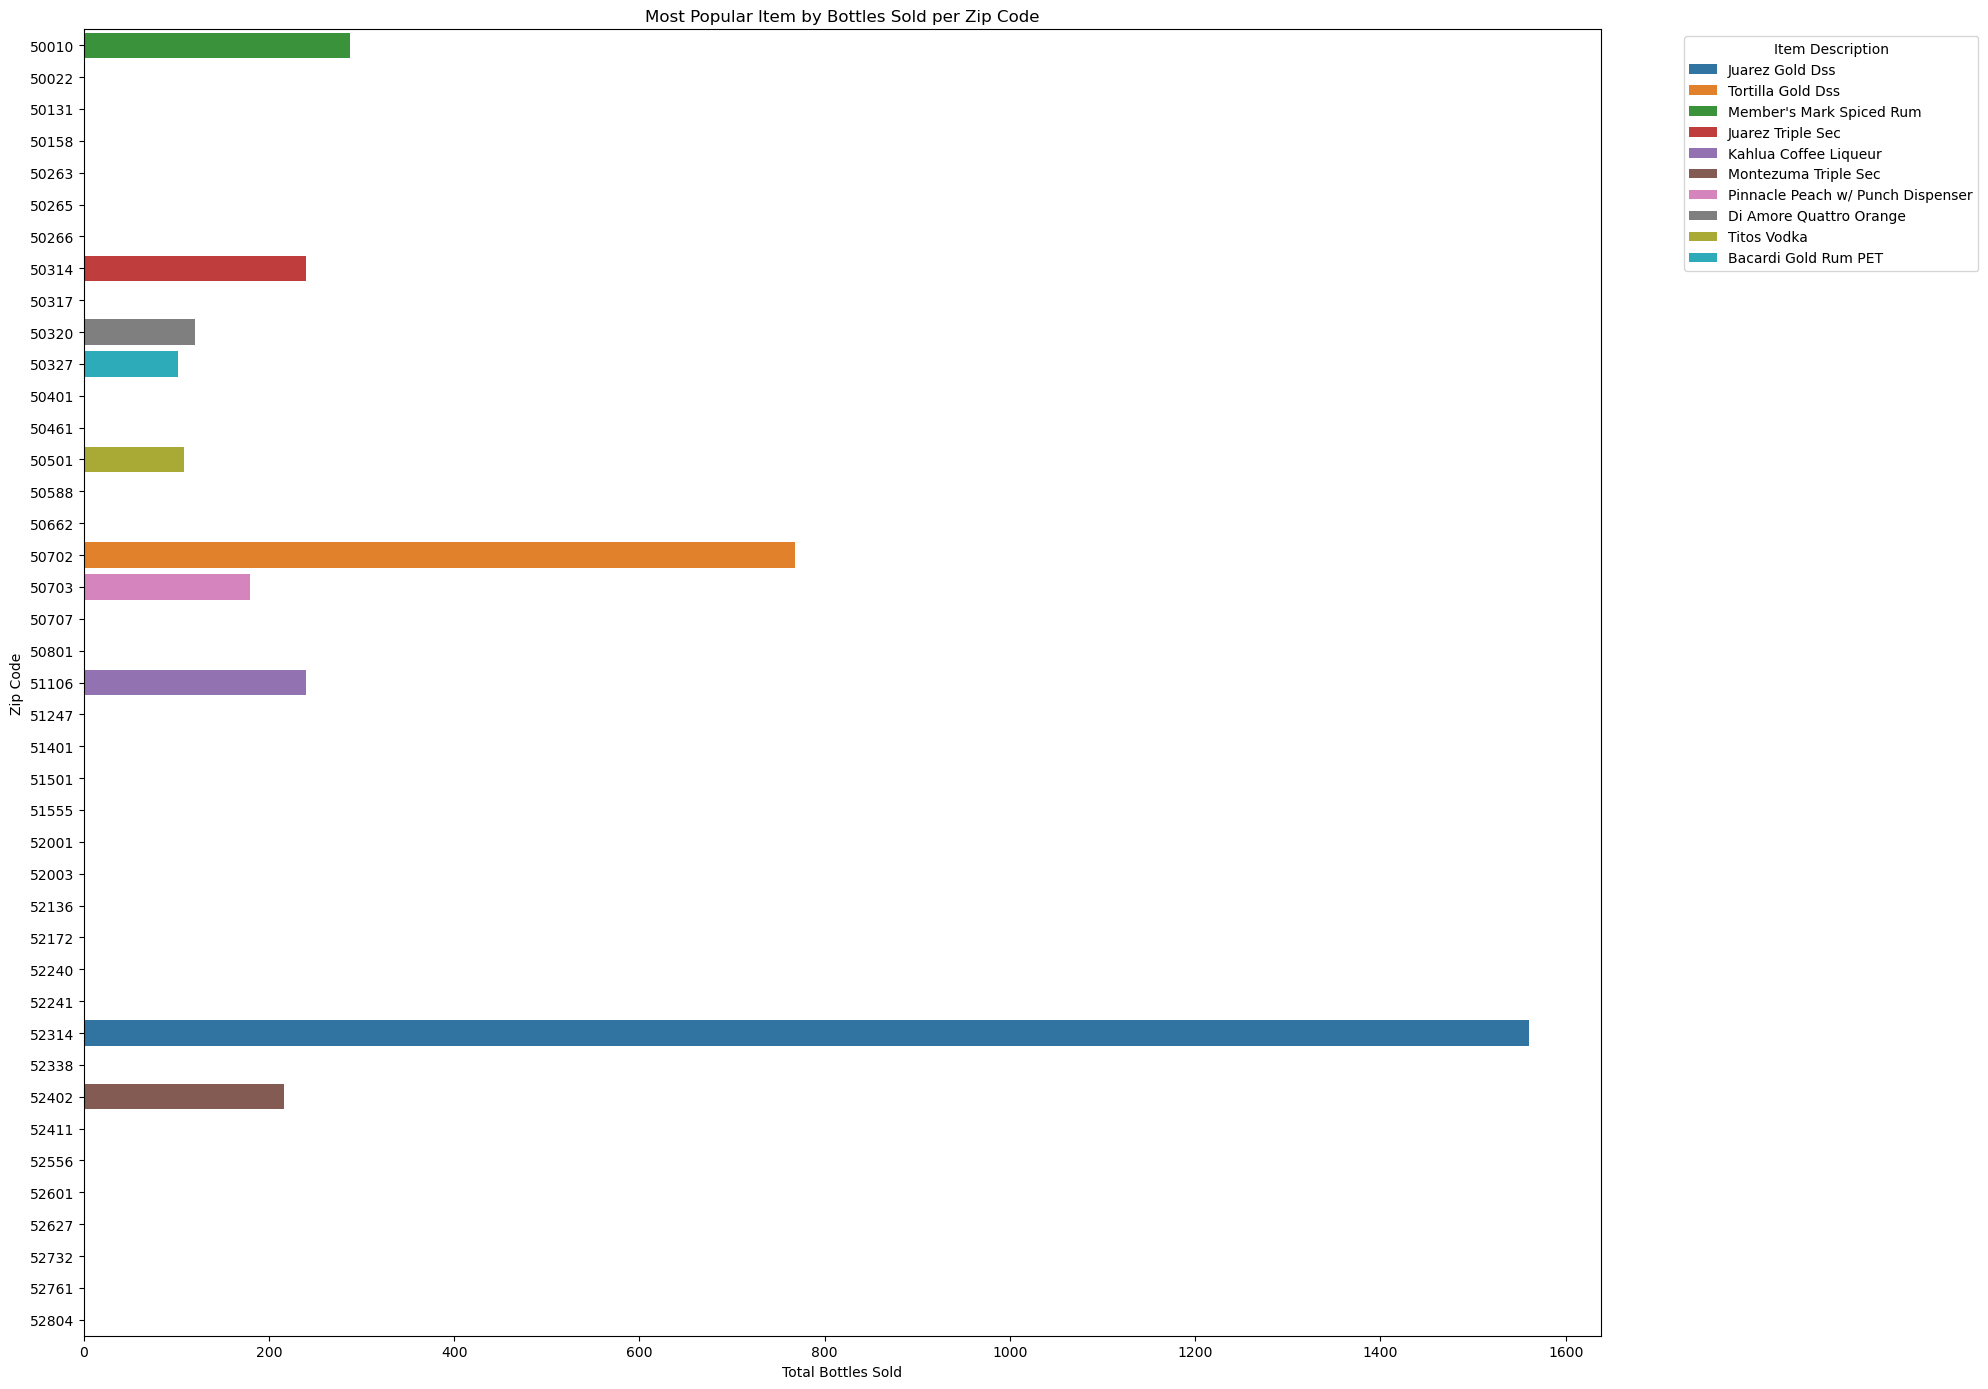

In [ ]:
# Find the top 10 zip_codes
top10_bottles_sold = most_volume_sold_item.sort_values('bottles_sold', ascending=False).head(10)

plt.figure(figsize=(20, 14))

# Plot
sns.barplot(
    data=top10_bottles_sold,
    y='zip_code',
    x='bottles_sold',
    hue='item_description',
    dodge=False  # keep 1 bar per zip_code
)

plt.title('Most Popular Item by Bottles Sold per Zip Code')
plt.xlabel('Total Bottles Sold')
plt.ylabel('Zip Code')

plt.legend(title='Item Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Visualize Using Plotly

In [ ]:
# Get top 10 zip codes by bottles sold
top_10_volume = most_volume_sold_item.sort_values('bottles_sold', ascending=False).head(10)

fig = px.pie(
    top_10_volume,
    names='zip_code',
    values='bottles_sold',
    title='Top 10 Zip Codes by Total Bottles Sold',
    hover_data=['item_description'],
    hole=0  # Set >0 for donut chart
)

fig.update_traces(textinfo='percent+label')

fig.show()

#### 2.1.2 Revenue Approach

In [ ]:
# 2. Group by zip_code and item_description and 
# calculate total sale_dollars
grouped_data2 = data.groupby(['zip_code', 'item_description'])['sale_dollars'].sum().reset_index()

# Sort within each zip_code by sale_dollars descending
grouped_data2 = grouped_data2.sort_values(['zip_code', 'sale_dollars'], ascending=[True, False])

# Keep top row per zip_code
most_revenue_item = grouped_data2.drop_duplicates(subset='zip_code', keep='first')

# Sort the results in descending order
most_revenue_item['zip_code'] = most_revenue_item['zip_code'].astype('category')

print(f'The most popular item by revenue per zip code is:\n{most_revenue_item}')

The most popular item by revenue per zip code is:
   zip_code                               item_description  sale_dollars
0     50010                       Member's Mark Spiced Rum       3913.92
1     50022                           Paramount Triple Sec         23.04
2     50131                              Platinum 7x Vodka         64.32
3     50158                                  Kahlua Coffee        112.47
5     50263                  Jagermeister w/2 Shot Glasses       1518.72
6     50265                                  Kahlua Coffee       1349.28
7     50266  Avion Silver w/Powell & Mahoney Margarita Mix       3372.30
8     50314                              Juarez Triple Sec        871.20
9     50317          Paul Masson Peach Grande Amber Brandy         70.56
11    50320               Glen Oaks Whiskey Buy the Barrel       1881.00
13    50327                           Bacardi Gold Rum PET       2295.00
14    50401            Ole Smoky Blackberry Moonshine Mini        630.24
1

C:\Users\vagdi\AppData\Local\Temp\ipykernel_15872\2609642490.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Visualize Using Seaborn

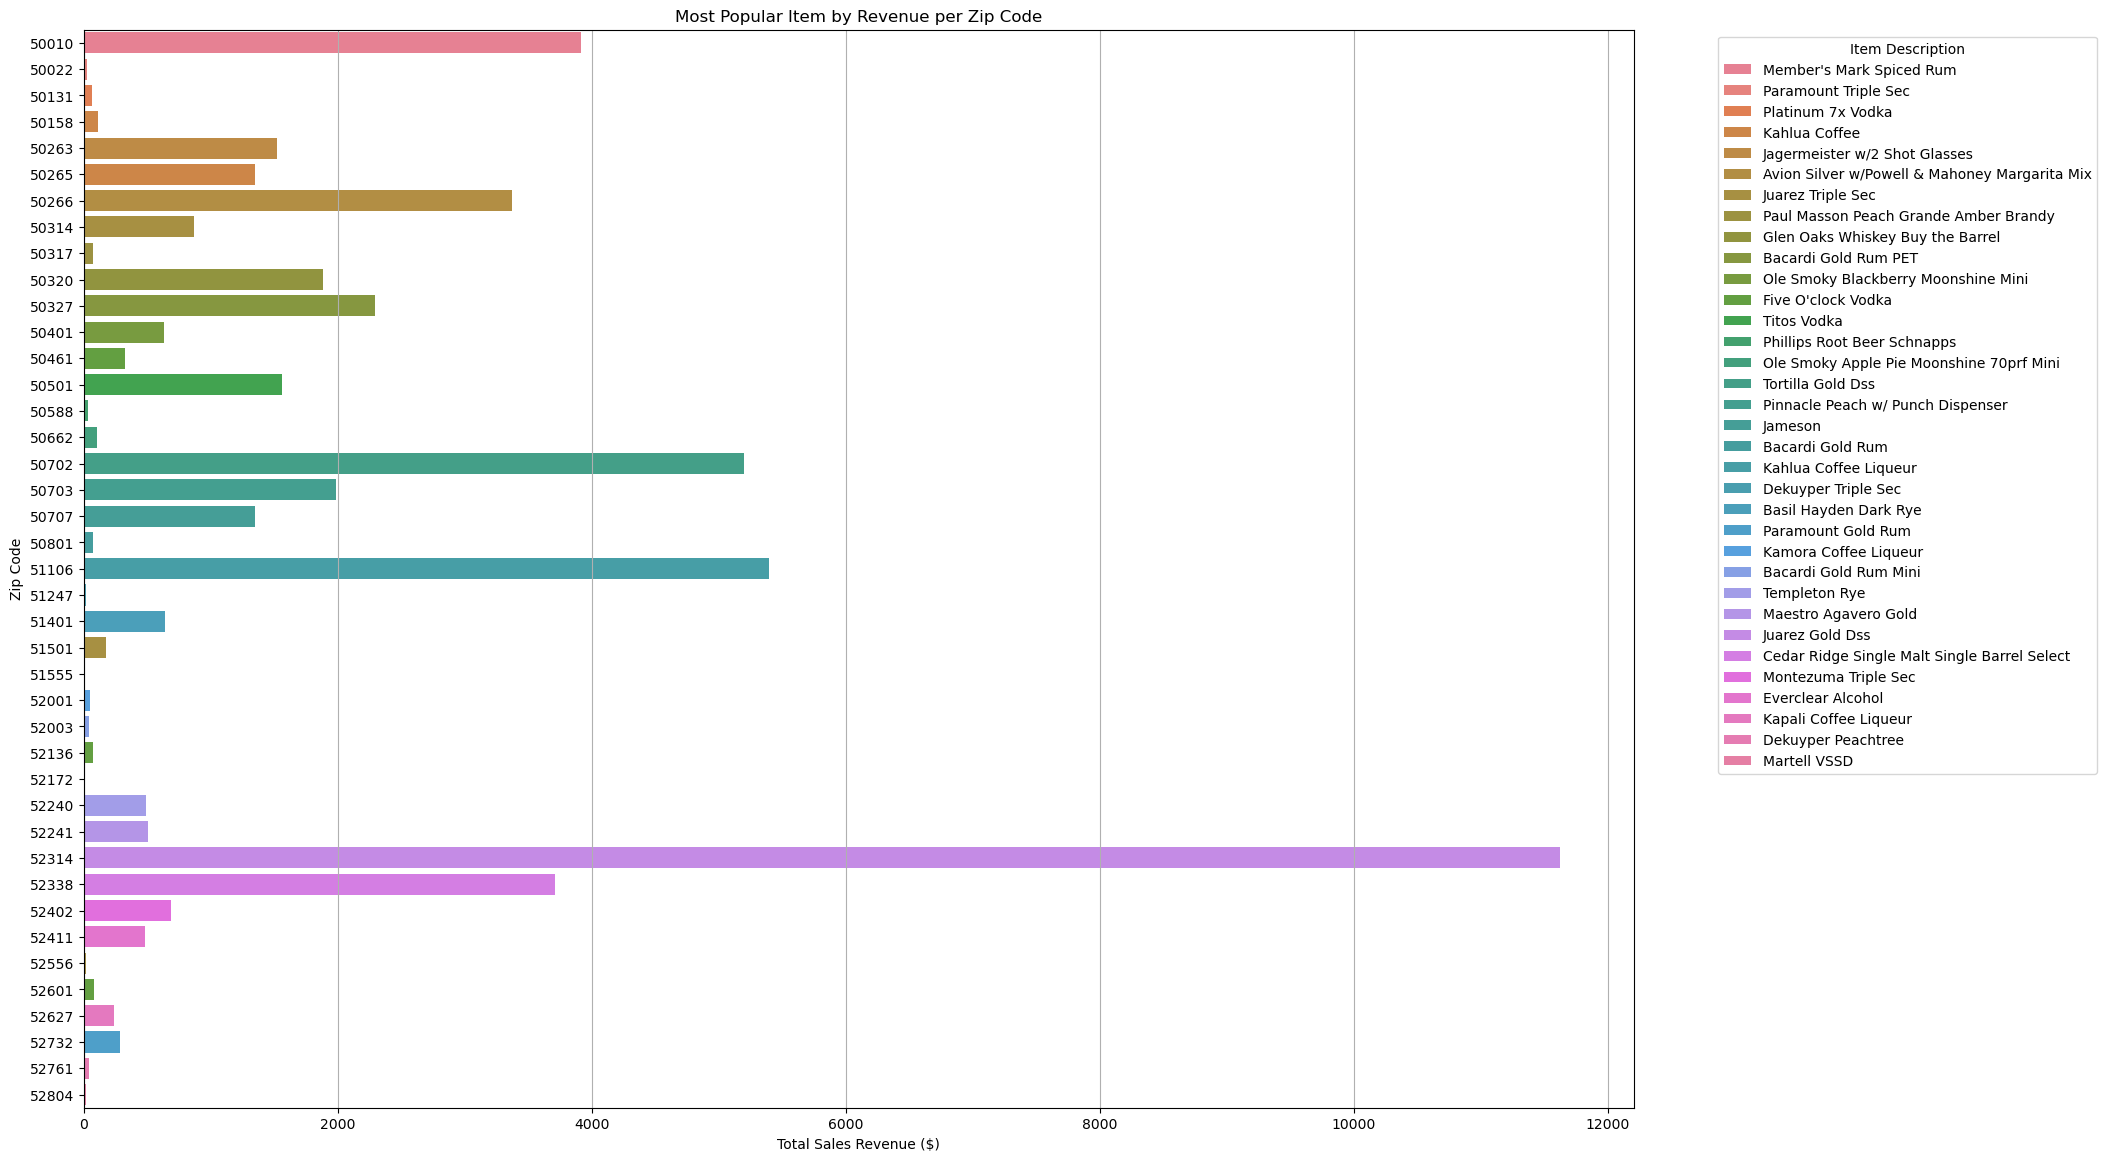

In [ ]:
plt.figure(figsize=(20, 14))

sns.barplot(
    data=most_revenue_item,
    y='zip_code',
    x='sale_dollars',
    hue='item_description',
    dodge=False  # 1 bar per zip_code
)

plt.title('Most Popular Item by Revenue per Zip Code')
plt.xlabel('Total Sales Revenue ($)')  # Adjust x-axis label
plt.ylabel('Zip Code')  # Adjust y-axis label
plt.legend(title='Item Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='x')
plt.show()

##### Visualize Using Plotly


In [ ]:
# Get top 10 zip codes by revenue
top_10_revenue = most_revenue_item.sort_values('sale_dollars', ascending=False).head(10)

fig = px.pie(
    top_10_revenue,
    names='zip_code',
    values='sale_dollars',
    title='Top 10 Zip Codes by Total Revenue',
    hover_data=['item_description'],
    hole=0  # Set >0 for donut chart
)

fig.update_traces(textinfo='percent+label')

fig.show()

### 2.2 Sales percentage per store (in dollars)

**Methodology:**

1. **Data Aggregation**:
   We grouped the data by `store_name` to calculate each store's total sales (`sale_dollars`).

2. **Overall Sales Calculation**:
   We calculated the total sales across all stores to establish a reference for the percentage contribution of each store.

3. **Percentage Calculation**:
   The percentage of total sales per store was computed using the formula:

   $$
   \text{Sales Percentage} = \left(\frac{\text{Store's Total Sales}}{\text{Overall Total Sales}}\right) \times 100
   $$

4. **Sorting**:
   The results were sorted in descending order of the sales percentage to highlight the highest-contributing stores.

In [ ]:
# Calculate the total amount of sale_dollars
overall_total_sales = data['sale_dollars'].sum()

# Group by store_name and calculate the store's total sales
grouped_store_sales = data.groupby('store_name')['sale_dollars'].sum().reset_index()

# Calculate percentage
grouped_store_sales['sales_percentage'] = (grouped_store_sales['sale_dollars'] / overall_total_sales) * 100

# Sorted results
grouped_store_sales = grouped_store_sales.sort_values('sales_percentage', ascending=False)
print(grouped_store_sales)

                              store_name  sale_dollars  sales_percentage
49                        Wilkie Liquors      11620.80         20.541781
41          Sam's Club 6432 / Sioux City       6641.04         11.739191
42            Sam's Club 6514 / Waterloo       5199.36          9.190771
14          Hy-Vee #3 / BDI / Des Moines       4124.04          7.289957
43                Sam's Club 6568 / Ames       3913.92          6.918533
2                  Cedar Ridge Vineyards       3712.50          6.562488
32         Hy-Vee Wine and Spirits / WDM       3372.30          5.961126
8    Fareway Stores #138 / Pleasant Hill       2295.00          4.056811
19       Hy-Vee Food Store #2 / Waterloo       1992.15          3.521471
24        Hy-Vee Food Store / Fort Dodge       1563.84          2.764359
16                       Hy-Vee / Waukee       1518.72          2.684601
7        Fareway Stores #067 / Evansdale       1349.40          2.385299
9   Fareway Stores #153  /  W Des Moines       1349

##### Visualize top 5 Using Plotly

In [ ]:
# Sort and select top 5
top_5_stores = grouped_store_sales.sort_values('sales_percentage', ascending=False).head(5)

# Create pie chart
fig = px.pie(
    top_5_stores,
    names='store_name',
    values='sales_percentage',
    title='Top 5 Stores by Sales Percentage'
)

fig.show()

## 3. Insights

### 3.1 Most Popular Item by Bottles Sold per Zip Code (Volume-Driven Analysis)

**Key Findings:**

1. **Diverse Preferences by Zip Code**: The analysis reveals significant variation in item popularity at the zip code level, underscoring the diversity of consumer preferences across different regions.

2. **Concentration of Sales Volume**:
   - The pie chart shows that **zip code 52314** leads substantially, accounting for over **40% of total bottles sold** among the top 10 zip codes, with "Juarez Gold Dss" as the predominant item. This indicates a strong concentration of demand in this area, likely driven by either local consumer preference or effective promotional activity for this product.
   - Zip code **50702** follows, contributing just over **20%** of total volume, with "Tortilla Gold Dss" being the most popular item. Other zip codes represent much smaller shares, each below 8%.

3. **Notable Products by Volume**:
   - "Juarez Gold Dss" and "Tortilla Gold Dss" are the most frequently purchased items by volume in their respective zip codes, with far higher sales than leading items in other areas.
   - Beyond the leading zip codes, there is much lower per-item volume across the remaining segments, suggesting more fragmented or localized demand for popular products.

4. **Regional Leaders and Inventory Implications**:
   - The top three zip codes (52314, 50702, and 50010) dominate the total volume, representing nearly 70% of all bottles sold among the observed top 10. This concentration highlights important regional leaders where inventory planning, supply chain focus, and marketing efforts can achieve maximum impact.
   - Zip codes such as 51106, 50314, and 52402, while not leading, still represent meaningful secondary markets and should be considered in product distribution and promotional strategies.

**Business Implications:**
- The clear regional dominance of particular items suggests **opportunities for targeted stocking, pricing, and promotional campaigns** in high-volume zip codes, especially where a single item constitutes a significant share of total sales.
- In areas with lower, more fragmented volume, a more **diversified inventory approach** may be necessary to cater to broader, niche preferences.

**Summary Table (Excerpt):**

| Zip Code | Most Popular Item                   | Total Bottles Sold |
|----------|-------------------------------------|-------------------|
| 52314    | Juarez Gold Dss                     | 1560              |
| 50702    | Tortilla Gold Dss                   | 768               |
| 50010    | Member's Mark Spiced Rum            | 288               |

---

**Overall Insight:**  
Volume-driven item analysis uncovers *clear hotspots of high demand* and offers a foundation for **regionally adaptive business strategies** in stocking, distribution, and marketing, particularly for top-performing products in leading zip codes.

### 3.2 Most Popular Item by Revenue per Zip Code (Revenue-Driven Analysis)

**Key Findings:**

1. **Distinct Revenue Leaders by Zip Code**  
   The revenue-driven analysis highlights significant differences in the most profitable items by zip code, with certain products commanding a notably higher share of total sales revenue in specific regions. This provides critical visibility into high-value items and premium purchasing behavior.

2. **High Revenue Concentration**  
   - **Zip code 52314** is the clear revenue leader, contributing approximately **28.4%** of total revenue among the top 10 zip codes (as illustrated in the pie chart). Its predominant product, "Juarez Gold Dss," alone generated over **$11,600**, making it both a high-volume and high-value leader.
   - **Zip codes 51106** and **50702** follow, with **13.2%** and **12.7%** of total revenue, respectively, each with distinct premium items at the top.
   - The distribution of revenue is less concentrated than pure volume sales: the leading zip code represents a smaller percentage of the total top-10 revenue than in the bottles-sold analysis, suggesting that revenue is more evenly spread among high-performing areas.

3. **High-Value Product Types**  
   - While some regions have overlap between the highest-volume and highest-revenue items, other zip codes show differences, indicating that certain premium products may not have the highest sales counts but significantly contribute to revenue due to higher price points.
   - For example, in zip code **51106**, "Kahlua Coffee Liqueur" is the lead revenue generator, pointing to strong demand for higher-priced or specialty liqueur categories.

4. **Wider Distribution of "Top Performer" Zip Codes**  
   - The revenue-based pie chart confirms that more zip codes contribute meaningfully to total revenue, with the top 10 together capturing a broad segment of the market. This may warrant broader distribution or sales efforts across additional locations, rather than focusing solely on the highest-volume regions.

**Business Implications:**
- **Revenue-focused resource allocation**: The clear identification of zip codes and items that drive the largest revenue opportunities enables a more **targeted approach to inventory investment, premium promotions, and profit maximization**.
- **Premiumization opportunities**: In regions where the leading item is more expensive (but not necessarily the top by volume), there exists an opportunity to further develop premium product lines or upsell strategies.
- **Balanced sales strategy**: Given the less concentrated revenue spread, businesses may benefit from **diversifying sales and marketing efforts across more regions** to maximize high-value product performance.

**Summary Table (Excerpt):**

| Zip Code | Most Popular Item                   | Total Revenue ($) |
|----------|-------------------------------------|-------------------|
| 52314    | Juarez Gold Dss                     |   $11,620.80      |
| 51106    | Kahlua Coffee Liqueur               |    $5,397.60      |
| 50702    | Tortilla Gold Dss                   |    $5,199.36      |


---

**Overall Insight:**  
Revenue-based item analysis *broadens the lens* on regional product performance, highlighting **where premium and high-margin items are most impactful**. This perspective supports **profit-driven, regionally adaptive merchandising and pricing strategies**, empowering businesses to capture value beyond just sheer sales volume.

### 3.3 Store-Level Sales Distribution Analysis

**Key Findings:**

1. **Sales Dominance Among Top Stores**  
   The analysis reveals a high concentration of sales among a small group of stores. **Wilkie Liquors** is the clear leader, accounting for approximately **20.5%** of overall sales—more than any other individual store. Combined, the top five stores contribute over **60%** of total sales (as visualized in the pie chart), underscoring a significant skew towards a select few high-performing outlets.

2. **Top Performing Stores**  
   - **Wilkie Liquors** alone generated $11,620.80 in sales, giving it a dominant position in the market.
   - The next highest contributors are **Sam’s Club 6432 / Sioux City** (11.7%), **Sam's Club 6514 / Waterloo** (9.2%), **Hy-Vee #3 / BDI / Des Moines** (7.3%), and **Sam's Club 6568 / Ames** (6.9%).
   - Each of these stores independently contributes a higher percentage of sales than most remaining stores combined.

3. **Long Tail of Smaller Outlets**  
   While a limited number of stores drive the majority of revenue, the remainder of outlets collectively represent a small fraction of total sales, often below 3% per store. Many stores contribute less than 1% each, indicating a **highly concentrated sales landscape with a long tail of low-volume sellers**.

4. **Business Implications**  
   - **Focused Investment and Relationship Management**: The dominant sales position of Wilkie Liquors and leading Sam’s Club and Hy-Vee locations suggests clear opportunities for prioritized inventory management, marketing investment, and partnership development.
   - **Strategic Differentiation for Lower-Performing Stores**: The long tail of smaller outlets may require a differentiated strategy, focusing on niche market tactics, localized promotions, or operational efficiencies rather than broad inventory expansion.

**Summary Table (Top 5 Excerpt):**

| Store Name                           | Total Sales ($) | Sales %   |
|--------------------------------------|-----------------|-----------|
| Wilkie Liquors                       | $11,620.80      | 20.5%     |
| Sam’s Club 6432 / Sioux City         | $6,641.04       | 11.7%     |
| Sam’s Club 6514 / Waterloo           | $5,199.36       | 9.2%      |
| Hy-Vee #3 / BDI / Des Moines         | $4,124.04       | 7.3%      |
| Sam’s Club 6568 / Ames               | $3,913.92       | 6.9%      |

---

**Overall Insight:**  
Store-level sales are **heavily concentrated within a small number of key outlets**, presenting clear opportunities for targeted sales and marketing efforts at these top performers. For the broader base of stores, a more tailored approach is warranted, potentially leveraging local insights or operational optimization to drive incremental growth. This concentration should inform **resource allocation, promotional partnerships, and overall market strategy** moving forward.